### USC ID  : 8534717045
### NAME   : SRINATH BEGUDEM
### GITHUB: SrinathBegudem

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prettytable import PrettyTable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn import metrics
from matplotlib import gridspec
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

# Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables:

- **Temperature (T)**
- **Ambient Pressure (AP)**
- **Relative Humidity (RH)**
- **Exhaust Vacuum (V)**

These variables are used to predict the net hourly electrical energy output (**EP**) of the plant.

## a) Download the Dataset

You can download the Combined Cycle Power Plant dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).


In [2]:
df = pd.read_excel("..\data\CCPP\Folds5x2_pp.xlsx")

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# b) Exploring the Data

## i. Dataset Size and Structure

- How many rows are in this data set? How many columns? What do the rows and columns represent?

## ii. Pairwise Scatterplots

- Make pairwise scatterplots of all the variables in the data set, including the predictors (independent variables) with the dependent variable. Describe your findings.

## iii. Descriptive Statistics

- What are the mean, median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.


In [3]:
print(f"Shape of the data: {df.shape}")

rows = df.shape[0]
columns = df.shape[1]

print(f"Number of Rows: {rows}")
print(f"Number of columns: {columns}")


print(f"The dataset has {rows} rows and {columns} columns.")


Shape of the data: (9568, 5)
Number of Rows: 9568
Number of columns: 5
The dataset has 9568 rows and 5 columns.


#### The rows in the dataset represent individual data points collected from the Combined Cycle Power Plant. Each row corresponds to a specific hour within the 6-year period (2006-2011) when the power plant was operating at full load.

#### The columns represent different features or variables measured during each hour. The key ambient variables include:

* **Temperature (T):** The hourly average ambient temperature.
* **Ambient Pressure (AP):** The hourly average ambient pressure.
* **Relative Humidity (RH):** The hourly average relative humidity.
* **Exhaust Vacuum (V):** The hourly average exhaust vacuum.

Additionally, there is a target variable:
* **Net Hourly Electrical Energy Output (EP):** The net hourly electrical energy output of the power plant, which is the variable to be predicted.

To conclude, each row provides information about the environmental conditions and the corresponding net electrical energy output for a specific hour in the operation of the power plant. The columns represent different measurements and the target variable for predictive modeling.


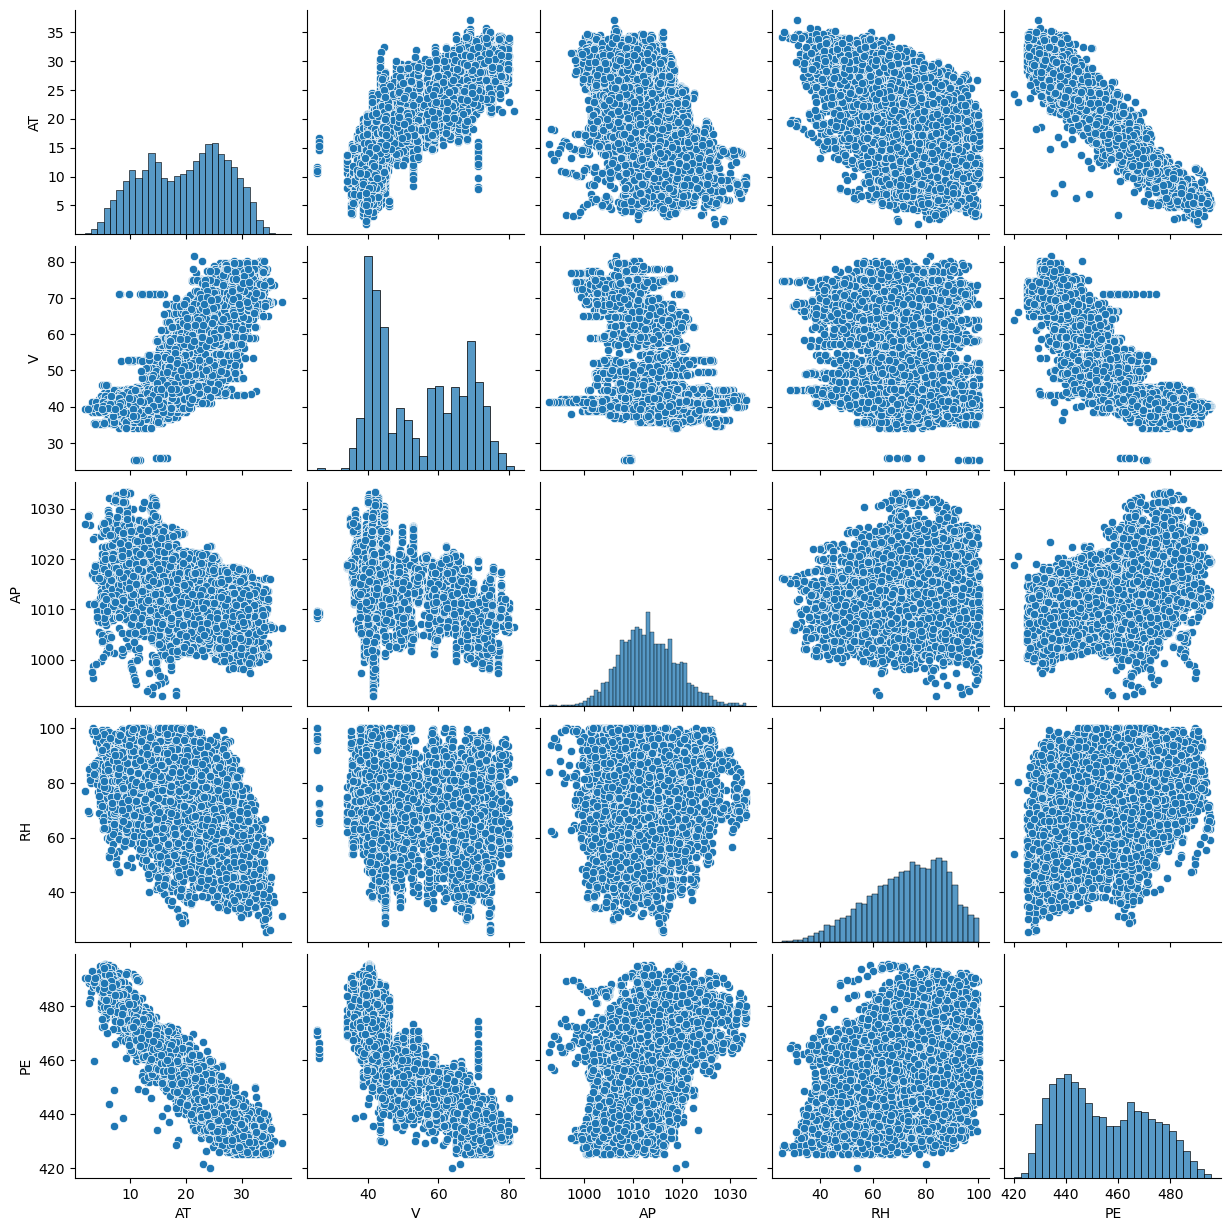

In [4]:
sns.pairplot(df)

"""In a seaborn pairplot, without specifying the 'hue' parameter, the plot doesn't distinguish between different classes or 
categories. When 'PE' is considered the dependent variable (DV), using it as the 'hue' allows seaborn to color points based 
on the values of 'PE'. This coloring aids in visually identifying relationships between the independent variables (IV) and the 
dependent variable, facilitating a clearer understanding of the dataset's patterns and correlations."""

plt.show()

In [5]:
descriptive_statistics = df.describe().transpose()


# calculation and adding IQR 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# calculation and adding Median
median = df.median()

#calculation and adding range 
data_range = df.max() - df.min()

# Adding IQR, median, range to Descriprive stats
descriptive_statistics['IQR'] = IQR
descriptive_statistics['median'] = median
descriptive_statistics['range'] = data_range


descriptive_statistics = descriptive_statistics[['mean','median','range', '25%', '75%','IQR', 'std', 'min', 'max']]

"""The to_markdown() method in pandas is a powerful tool for converting DataFrames into Markdown-formatted tables. This method 
provides a clean and readable representation of tabular data, making it well-suited for use in Jupyter Notebooks,
README files, and other Markdown-based documents."""

print("Descriptive Statistics:")
print(descriptive_statistics.to_markdown())
print("\nfirst and third quartiles are 25% and 75% respectively")

Descriptive Statistics:
|    |      mean |   median |   range |       25% |     75% |     IQR |      std |    min |     max |
|:---|----------:|---------:|--------:|----------:|--------:|--------:|---------:|-------:|--------:|
| AT |   19.6512 |   20.345 |   35.3  |   13.51   |   25.72 | 12.21   |  7.45247 |   1.81 |   37.11 |
| V  |   54.3058 |   52.08  |   56.2  |   41.74   |   66.54 | 24.8    | 12.7079  |  25.36 |   81.56 |
| AP | 1013.26   | 1012.94  |   40.41 | 1009.1    | 1017.26 |  8.16   |  5.93878 | 992.89 | 1033.3  |
| RH |   73.309  |   74.975 |   74.6  |   63.3275 |   84.83 | 21.5025 | 14.6003  |  25.56 |  100.16 |
| PE |  454.365  |  451.55  |   75.5  |  439.75   |  468.43 | 28.68   | 17.067   | 420.26 |  495.76 |

first and third quartiles are 25% and 75% respectively


**c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?**



OLS Regression Results for 'AT' vs. 'PE':
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:53   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

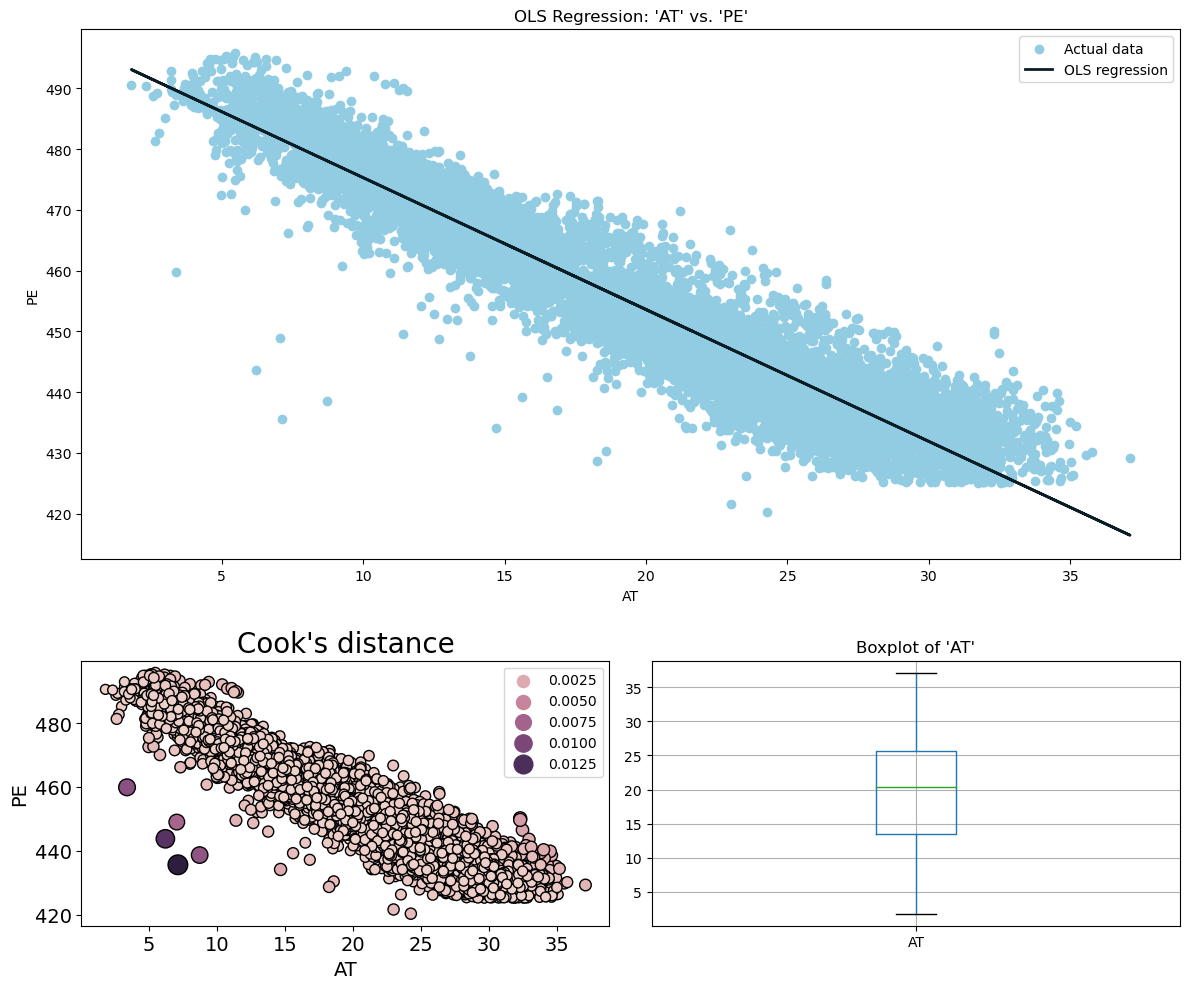

In [6]:
# simple linear regression model
X_DATA_AT = df[['AT']]
X_DATA_AT = sm.add_constant(X_DATA_AT)  # Add a constant term for the intercept
y_DATA_AT = df['PE']

model = sm.OLS(y_DATA_AT, X_DATA_AT).fit()

# OLS summary
print("\nOLS Regression Results for 'AT' vs. 'PE':")
print(model.summary())



# Checking if the p-value is less than 0.05
p_value = model.pvalues['AT'] 
if p_value < 0.05:
    print("\n In this model there is statistically significant association between the predictor and the response.")
else:
    print("\nNo statistically significant association.")

# Calculate IQR for 'AT'
Q1 = df['AT'].quantile(0.25)
Q3 = df['AT'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['AT'] < lower_bound) | (df['AT'] > upper_bound)]

# Checking if there are outliers
if outliers_iqr.empty:
    print("\nNo outliers detected using IQR.")
else:
    print("\nOutliers detected using IQR:")
    print(outliers_iqr)
    
# Creating a grid
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 1])

# Linear Regression Plot 
ax0 = plt.subplot(gs[0, 0:2])
ax0.scatter(df['AT'], y_DATA_AT, color='#91cce3', label='Actual data')
ax0.plot(df['AT'], model.predict(X_DATA_AT), color='#0b1d24', linewidth=2, label='OLS regression')
ax0.set_title("OLS Regression: 'AT' vs. 'PE'")
ax0.set_xlabel('AT')
ax0.set_ylabel('PE')
ax0.legend()

# Cook's distance plot
ax1 = plt.subplot(gs[1, 0])
influence = model.get_influence()
(cook_distance, _) = influence.cooks_distance
sns.scatterplot(x=X_DATA_AT['AT'], y=y_DATA_AT, hue=cook_distance, size=cook_distance, sizes=(50, 200), edgecolor='black', linewidth=1, ax=ax1)
ax1.tick_params(axis='both', labelsize=14)  # Set font size
ax1.set_xlabel('AT', fontsize=14)
ax1.set_ylabel('PE', fontsize=14)
ax1.set_title("Cook's distance", fontsize=20)

# Box plot for 'AT'
ax2 = plt.subplot(gs[1, 1])
df.boxplot(column=['AT'], ax=ax2)
ax2.set_title("Boxplot of 'AT'")

plt.tight_layout(h_pad=2) 
plt.show()


### Statistically Significant Association:
The regression model assessing the relationship between 'AT' (Ambient Temperature) and 'PE' (Power Output) indicates a **statistically significant association**. This is supported by the p-value associated with the coefficient for 'AT' being less than 0.05 (p-value: 0.000).

### Outliers Detection (Using IQR):
No outliers were detected for the 'AT' variable using the **Interquartile Range (IQR) method**. This suggests that, based on the IQR criterion, there are no extreme values considered outliers in the dataset.

### Cook's Distance Outliers:
Cook's distance was employed to identify influential data points. The analysis revealed several data points with a distance of 0.0050 or higher, which were flagged as outliers by Cook's distance. These points are considered influential and may have a substantial impact on the model.

### Correlation Assessment:
- **Correlation:** Negative
- **Interpretation:** The coefficient for 'AT' is -2.1713, indicating a negative correlation. As 'AT' increases, 'PE' tends to decrease.


OLS Regression Results for 'V' vs. 'PE':
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:54   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

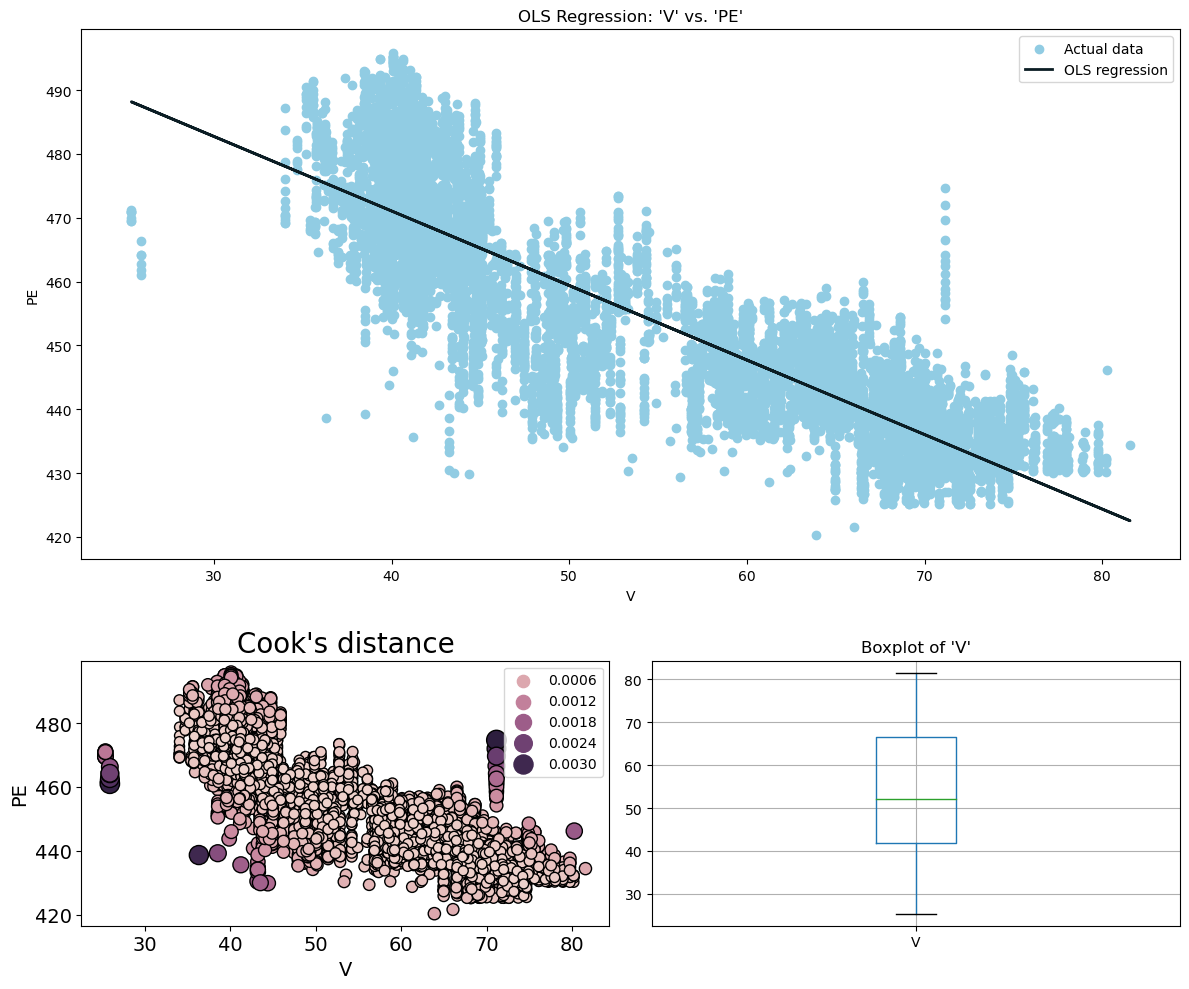

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

X_DATA_V = df[['V']]
X_DATA_V = sm.add_constant(X_DATA_V)
y_DATA_PE = df['PE']

model_v_pe = sm.OLS(y_DATA_PE, X_DATA_V).fit()

print("\nOLS Regression Results for 'V' vs. 'PE':")
print(model_v_pe.summary())

p_value_v_pe = model_v_pe.pvalues['V']
if p_value_v_pe < 0.05:
    print("\nIn this model, there is a statistically significant association between the predictor 'V' and the response 'PE'.")
else:
    print("\nNo statistically significant association.")

Q1_v = df['V'].quantile(0.25)
Q3_v = df['V'].quantile(0.75)
IQR_v = Q3_v - Q1_v

lower_bound_v = Q1_v - 1.5 * IQR_v
upper_bound_v = Q3_v + 1.5 * IQR_v

outliers_iqr_v = df[(df['V'] < lower_bound_v) | (df['V'] > upper_bound_v)]

if outliers_iqr_v.empty:
    print("\nNo outliers detected using IQR for 'V'.")
else:
    print("\nOutliers detected using IQR for 'V':")
    print(outliers_iqr_v)

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 1])

ax0 = plt.subplot(gs[0, 0:2])
ax0.scatter(df['V'], y_DATA_PE, color='#91cce3', label='Actual data')
ax0.plot(df['V'], model_v_pe.predict(X_DATA_V), color='#0b1d24', linewidth=2, label='OLS regression')
ax0.set_title("OLS Regression: 'V' vs. 'PE'")
ax0.set_xlabel('V')
ax0.set_ylabel('PE')
ax0.legend()

ax1 = plt.subplot(gs[1, 0])
influence_v_pe = model_v_pe.get_influence()
(cook_distance_v_pe, _) = influence_v_pe.cooks_distance
sns.scatterplot(x=X_DATA_V['V'], y=y_DATA_PE, hue=cook_distance_v_pe, size=cook_distance_v_pe, sizes=(50, 200), edgecolor='black', linewidth=1, ax=ax1)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlabel('V', fontsize=14)
ax1.set_ylabel('PE', fontsize=14)
ax1.set_title("Cook's distance", fontsize=20)

ax2 = plt.subplot(gs[1, 1])
df.boxplot(column=['V'], ax=ax2)
ax2.set_title("Boxplot of 'V'")

plt.tight_layout(h_pad=2)
plt.show()




### Statistically Significant Association:

The regression model assessing the relationship between 'V' and 'PE' indicates a **statistically significant association**. The p-value associated with the coefficient for 'V' is less than 0.05 (p-value: 0.000).

### Outliers Detection (Using IQR):

No outliers were detected for the 'V' variable using the **Interquartile Range (IQR) method**.

### Cook's Distance Outliers:

Cook's distance was employed to identify influential data points. Further analysis revealed several data points with a distance of 0.0018 or higher, flagged as outliers by Cook's distance. These points are considered influential and may have a substantial impact on the model.

### Correlation Assessment:

- **Correlation:** Negative
- **Interpretation:** The coefficient for 'V' is -1.1681, indicating a negative correlation. As 'V' increases, 'PE' tends to decrease.


OLS Regression Results for 'AP' vs. 'PE':
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:55   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

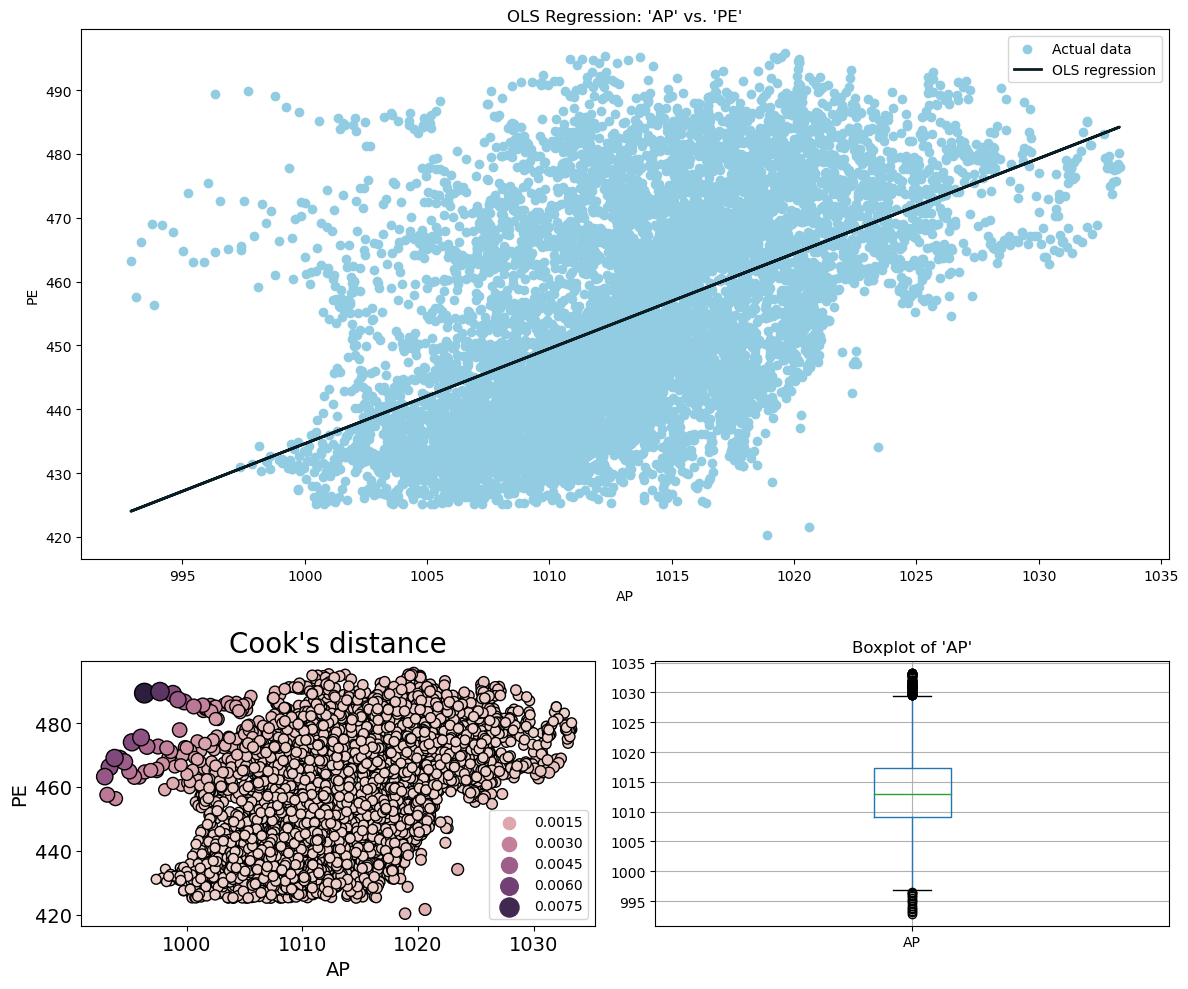

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


X_DATA_AP = df[['AP']]
X_DATA_AP = sm.add_constant(X_DATA_AP)
y_DATA_PE = df['PE']

model_ap_pe = sm.OLS(y_DATA_PE, X_DATA_AP).fit()

print("\nOLS Regression Results for 'AP' vs. 'PE':")
print(model_ap_pe.summary())


p_value_ap_pe = model_ap_pe.pvalues['AP']
if p_value_ap_pe < 0.05:
    print("\nIn this model, there is a statistically significant association between the predictor 'AP' and the response 'PE'.")
else:
    print("\nNo statistically significant association.")

Q1_ap = df['AP'].quantile(0.25)
Q3_ap = df['AP'].quantile(0.75)
IQR_ap = Q3_ap - Q1_ap

lower_bound_ap = Q1_ap - 1.5 * IQR_ap
upper_bound_ap = Q3_ap + 1.5 * IQR_ap

outliers_iqr_ap = df[(df['AP'] < lower_bound_ap) | (df['AP'] > upper_bound_ap)]

if outliers_iqr_ap.empty:
    print("\nNo outliers detected using IQR for 'AP'.")
else:
    print("\nOutliers detected using IQR for 'AP':")
    print(outliers_iqr_ap['AP'])

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 1])

ax0 = plt.subplot(gs[0, 0:2])
ax0.scatter(df['AP'], y_DATA_PE, color='#91cce3', label='Actual data')
ax0.plot(df['AP'], model_ap_pe.predict(X_DATA_AP), color='#0b1d24', linewidth=2, label='OLS regression')
ax0.set_title("OLS Regression: 'AP' vs. 'PE'")
ax0.set_xlabel('AP')
ax0.set_ylabel('PE')
ax0.legend()

ax1 = plt.subplot(gs[1, 0])
influence_ap_pe = model_ap_pe.get_influence()
(cook_distance_ap_pe, _) = influence_ap_pe.cooks_distance
sns.scatterplot(x=X_DATA_AP['AP'], y=y_DATA_PE, hue=cook_distance_ap_pe, size=cook_distance_ap_pe, sizes=(50, 200), edgecolor='black', linewidth=1, ax=ax1)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlabel('AP', fontsize=14)
ax1.set_ylabel('PE', fontsize=14)
ax1.set_title("Cook's distance", fontsize=20)

ax2 = plt.subplot(gs[1, 1])
df.boxplot(column=['AP'], ax=ax2)
ax2.set_title("Boxplot of 'AP'")

plt.tight_layout(h_pad=2)
plt.show()


### Statistically Significant Association:

The regression model assessing the relationship between 'AP' (Ambient Pressure) and 'PE' (Power Output) indicates a **statistically significant association**. This is supported by the p-value associated with the coefficient for 'AP' being less than 0.05 (p-value: 0.000).

### Outliers Detection (Using IQR):

Outliers were detected for the 'AP' variable using the **Interquartile Range (IQR) method**. A total of 88 outliers were identified.

### Cook's Distance Outliers:

Cook's distance was employed to identify influential data points. Further analysis revealed several data points with a distance of 0.0030 or higher, flagged as outliers by Cook's distance. These points are considered influential and may have a substantial impact on the model.


### Correlation:

- **Correlation Coefficient:** Positive (1.4899)
- **Interpretation:** As 'AP' increases, 'PE' tends to increase as well, as suggested by the positive coefficient.



OLS Regression Results for 'RH' vs. 'PE':
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:57   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

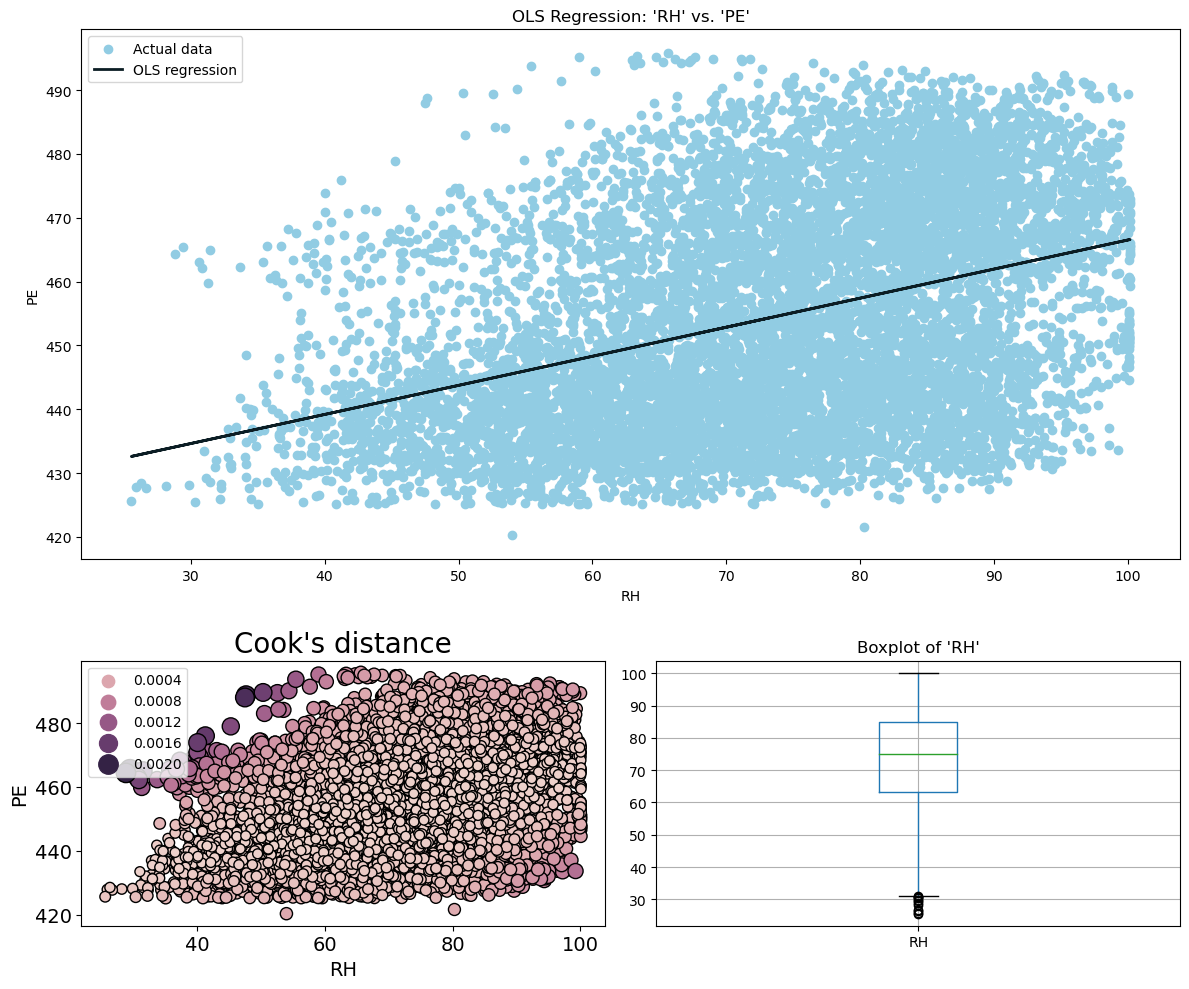

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


X_DATA_RH = df[['RH']]
X_DATA_RH = sm.add_constant(X_DATA_RH)
y_DATA_PE = df['PE']

model_rh_pe = sm.OLS(y_DATA_PE, X_DATA_RH).fit()

print("\nOLS Regression Results for 'RH' vs. 'PE':")
print(model_rh_pe.summary())


p_value_rh_pe = model_rh_pe.pvalues['RH']
if p_value_rh_pe < 0.05:
    print("\nIn this model, there is a statistically significant association between the predictor 'RH' and the response 'PE'.")
else:
    print("\nNo statistically significant association.")

Q1_rh = df['RH'].quantile(0.25)
Q3_rh = df['RH'].quantile(0.75)
IQR_rh = Q3_rh - Q1_rh

lower_bound_rh = Q1_rh - 1.5 * IQR_rh
upper_bound_rh = Q3_rh + 1.5 * IQR_rh

outliers_iqr_rh = df[(df['RH'] < lower_bound_rh) | (df['RH'] > upper_bound_rh)]

if outliers_iqr_rh.empty:
    print("\nNo outliers detected using IQR for 'RH'.")
else:
    print("\nOutliers detected using IQR for 'RH':")
    print(outliers_iqr_rh['RH'])

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 1])

ax0 = plt.subplot(gs[0, 0:2])
ax0.scatter(df['RH'], y_DATA_PE, color='#91cce3', label='Actual data')
ax0.plot(df['RH'], model_rh_pe.predict(X_DATA_RH), color='#0b1d24', linewidth=2, label='OLS regression')
ax0.set_title("OLS Regression: 'RH' vs. 'PE'")
ax0.set_xlabel('RH')
ax0.set_ylabel('PE')
ax0.legend()

ax1 = plt.subplot(gs[1, 0])
influence_rh_pe = model_rh_pe.get_influence()
(cook_distance_rh_pe, _) = influence_rh_pe.cooks_distance
sns.scatterplot(x=X_DATA_RH['RH'], y=y_DATA_PE, hue=cook_distance_rh_pe, size=cook_distance_rh_pe, sizes=(50, 200), edgecolor='black', linewidth=1, ax=ax1)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlabel('RH', fontsize=14)
ax1.set_ylabel('PE', fontsize=14)
ax1.set_title("Cook's distance", fontsize=20)

ax2 = plt.subplot(gs[1, 1])
df.boxplot(column=['RH'], ax=ax2)
ax2.set_title("Boxplot of 'RH'")

plt.tight_layout(h_pad=2)
plt.show()


### Statistically Significant Association:

The regression model assessing the relationship between 'RH' (Relative Humidity) and 'PE' (Power Output) indicates a **statistically significant association**. This is supported by the p-value associated with the coefficient for 'RH' being less than 0.05 (p-value: 0.000).

### Outliers Detection (Using IQR):

Outliers were detected for the 'RH' variable using the **Interquartile Range (IQR) method**. A total of 12 outliers were identified for 'RH'.
### Cook's Distance Outliers:

Cook's distance was employed to identify influential data points. Further analysis revealed several data points with a distance of 0.0008 or higher, flagged as outliers by Cook's distance. These points are considered influential and may have a substantial impact on the model.


### Correlation:

- **Correlation Coefficient:** 0.4557
- **Interpretation:** The positive coefficient (0.4557) suggests that as 'RH' increases, 'PE' tends to increase as well. This positive correlation indicates a potential positive impact of 'RH' on 'PE'.


**d)
Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis H0:βj = 0 ?**

In [10]:
import statsmodels.api as sm



X_all = df[['AT', 'V', 'AP', 'RH']]
X_all = sm.add_constant(X_all)
y = df['PE']

model_all = sm.OLS(y, X_all).fit()


print("\nMultiple Regression Results:")
print(model_all.summary())



Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:58   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093 

**For all predictors (AT, V, AP, RH) and the constant term (const), the p-values are very close to zero (0.000), which 
means you can reject the null hypothesis for each of these predictors. Therefore, it is the evidence to suggest that all 
of these predictors are statistically significant in predicting the target variable (PE).**






# Understanding Hypothesis Testing in Multiple Linear Regression

## 1. Null Hypothesis (H0):
- In statistical hypothesis testing, the null hypothesis (H0) is a statement that there is no significant difference, effect, or relationship. It often represents a default or baseline assumption.
- In multiple linear regression, the null hypothesis for each individual coefficient (βj) is that it is equal to zero.
- Example: For the Temperature predictor (AT), the null hypothesis is H0: β_AT = 0, indicating no effect on the dependent variable.

## 2. Alternative Hypothesis (H1):
- The alternative hypothesis (H1) contradicts the null hypothesis and suggests a significant difference, effect, or relationship.
- In multiple linear regression, the alternative hypothesis is that the coefficient is not equal to zero.

## 3. P-Value:
- The p-value is a measure of the evidence against a null hypothesis. It tells you how likely you would observe the data if the null hypothesis were true.
- A low p-value (usually less than 0.05) indicates enough evidence to reject the null hypothesis.

## 4. Rejecting the Null Hypothesis:
- If the p-value is less than your chosen significance level (commonly 0.05), you reject the null hypothesis.
- Rejecting the null hypothesis means there is enough statistical evidence to suggest that the predictor variable has a significant effect on the dependent variable.

## 5. Application to Coefficients in Multiple Linear Regression:
- In multiple linear regression output, each coefficient (const, AT, V, AP, RH) has an associated p-value.
- If the p-value for a specific coefficient is less than your chosen significance level, you can reject the null hypothesis for that coefficient.
- Example: If p-value_AT is 0.000, you reject H0: β_AT = 0, indicating a significant effect of Temperature (AT) on the dependent variable.

**In summary, hypothesis testing in regression assesses whether each predictor significantly contributes to explaining the variation in the dependent variable. Rejecting the null hypothesis implies a statistically significant effect of the corresponding predictor on the outcome.**


In [11]:
import statsmodels.api as sm



predictors = ["AT", "V", "AP", "RH"]


simple_linear_regression_coefficients = []
multiple_linear_regression_coefficients = []

for predictor in predictors:
    X = df[[predictor]]
    X = sm.add_constant(X)
    y = df['PE']

    model_simple = sm.OLS(y, X).fit()

    # Append the coefficient for the current variable to the list
    simple_linear_regression_coefficients.append(model_simple.params[predictor])
    print(f"Simple Linear Regression Equation for {predictor}:")
    equation_simple_linear = f"y = {model_simple.params['const']:.4f} + {model_simple.params[predictor]:.4f} * {predictor}"
    print(equation_simple_linear)
    print()


print("Simple Linear Regression Coefficients:")
for i, predictor in enumerate(predictors):
    print(f"{predictor}: {simple_linear_regression_coefficients[i]}")


X_all = df[['AT', 'V', 'AP', 'RH']]
X_all = sm.add_constant(X_all)
model_multiple = sm.OLS(y, X_all).fit()


print("\nMultiple Linear Regression Equation:")
equation_multilinear = f"y = {model_multiple.params['const']:.4f} + "
for i, predictor in enumerate(predictors):
    coefficient = model_multiple.params[predictor]
    multiple_linear_regression_coefficients.append(coefficient)
    equation_multilinear += f"{coefficient:.4f} * {predictor} + "
equation_multilinear = equation_multilinear[:-2]  
print(equation_multilinear)


print("\nMultiple Regression Coefficients:")
for predictor, coefficient in zip(X_all.columns[1:], model_multiple.params[1:]):
    print(f"{predictor}: {coefficient}")





Simple Linear Regression Equation for AT:
y = 497.0341 + -2.1713 * AT

Simple Linear Regression Equation for V:
y = 517.8015 + -1.1681 * V

Simple Linear Regression Equation for AP:
y = -1055.2610 + 1.4899 * AP

Simple Linear Regression Equation for RH:
y = 420.9618 + 0.4557 * RH

Simple Linear Regression Coefficients:
AT: -2.171319958517788
V: -1.168135126555709
AP: 1.4898716733991129
RH: 0.4556501022629822

Multiple Linear Regression Equation:
y = 454.6093 + -1.9775 * AT + -0.2339 * V + 0.0621 * AP + -0.1581 * RH 

Multiple Regression Coefficients:
AT: -1.9775131066353926
V: -0.23391642258249906
AP: 0.06208294378085444
RH: -0.1580541029164157


## e) Results Comparison

**How do your results from 1c compare to your results from 1d?**

Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.


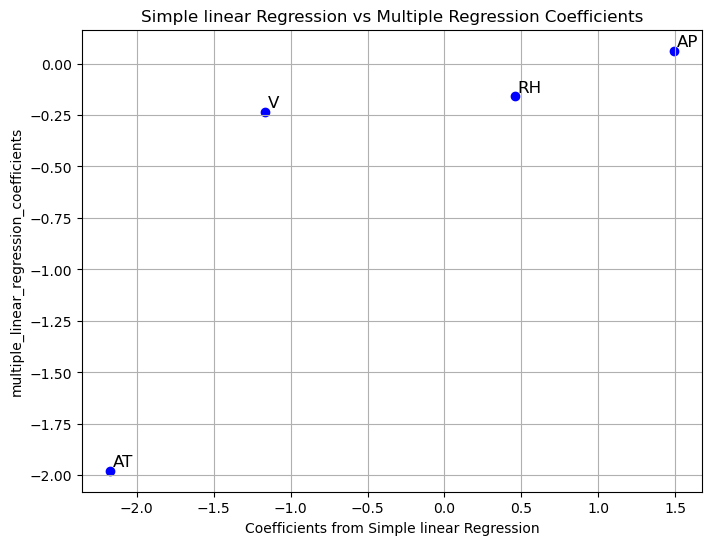

In [12]:
predictors = ["AT", "V", "AP", "RH"]

plt.figure(figsize=(8, 6))
plt.scatter(simple_linear_regression_coefficients,multiple_linear_regression_coefficients, marker='o', color='blue')

for i, predictor in enumerate(predictors):
    plt.annotate(predictor, (simple_linear_regression_coefficients[i] + 0.02, multiple_linear_regression_coefficients[i] + 0.02), fontsize=12)

"""he value 0.02 was added to the x and y coordinates of the annotations to provide a slight separation between the points and
their labels. This was done to prevent the labels from overlapping with the points in the scatter plot, making it easier to read."""

plt.xlabel("Coefficients from Simple linear Regression")
plt.ylabel("multiple_linear_regression_coefficients")
plt.title("Simple linear Regression vs Multiple Regression Coefficients")
plt.grid(True)

# Display the plot
plt.show()

**(f)
Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
 Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3**

In [13]:
import statsmodels.api as sm
import pandas as pd


predictors = ["AT", "V", "AP", "RH"]


for predictor in predictors:
    
    X = df[predictor]
    X_squared = X**2
    X_cubed = X**3
    Y = df['PE']

   
    data_poly = pd.DataFrame({predictor: X, f"{predictor}_squared": X_squared, f"{predictor}_cubed": X_cubed, 'PE': Y})


    model_poly = sm.OLS(data_poly['PE'], sm.add_constant(data_poly[[predictor, f"{predictor}_squared", f"{predictor}_cubed"]])).fit()

 
    print(f"\nPolynomial Regression Results for '{predictor}' vs. 'PE':")
    print(model_poly.summary())



Polynomial Regression Results for 'AT' vs. 'PE':
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:58   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**g)
Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant**

In [14]:
import statsmodels.api as sm


df_interactions = df.copy()


predictors = ["AT", "V", "AP", "RH"]


for i in range(len(predictors)):
    for j in range(i+1, len(predictors)):
        interaction_term = f"{predictors[i]}_{predictors[j]}"
        df_interactions[interaction_term] = df_interactions[predictors[i]] * df_interactions[predictors[j]]


df_interactions = sm.add_constant(df_interactions)


y = df_interactions['PE']


X_all_interactions = df_interactions.drop('PE', axis=1)


model_interactions = sm.OLS(y, X_all_interactions).fit()


print("\nMultiple Regression Results with Interaction Terms:")
print(model_interactions.summary())



Multiple Regression Results with Interaction Terms:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:58   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

**h)
Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs**

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('PE', axis=1)
y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





### Model 1 - All Predictors:




In [16]:
import statsmodels.api as sm
from sklearn import metrics


X_train_model_1 = sm.add_constant(X_train)
X_test_model_1 = sm.add_constant(X_test)


lr_model_1 = sm.OLS(y_train, X_train_model_1).fit()


y_train_pred = lr_model_1.predict(X_train_model_1)
y_test_pred = lr_model_1.predict(X_test_model_1)


r2_train_model_1 = metrics.r2_score(y_train, y_train_pred)
r2_test_model_1 = metrics.r2_score(y_test, y_test_pred)


print("R² on Training Data:", r2_train_model_1)
print("R² on Testing Data:", r2_test_model_1)


training_error_1 = metrics.mean_squared_error(y_train, y_train_pred)
testing_error_1 = metrics.mean_squared_error(y_test, y_test_pred)
print("Training Error of Model 1:", training_error_1)
print("Testing Error of Model 1:", testing_error_1)


print(lr_model_1.summary())


R² on Training Data: 0.9291361021558927
R² on Testing Data: 0.9275484963869204
Training Error of Model 1: 20.580839725738695
Testing Error of Model 1: 21.239856938225497
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:58   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

### Model 2 - All Predictors with Degree 2 and Interaction Terms:




In [17]:
import statsmodels.api as sm
from sklearn import metrics


X_train_model_2 = X_train.copy()
X_train_model_2["AT^2"] = X_train_model_2["AT"] ** 2
X_train_model_2["V^2"] = X_train_model_2["V"] ** 2
X_train_model_2["AP^2"] = X_train_model_2["AP"] ** 2
X_train_model_2["RH^2"] = X_train_model_2["RH"] ** 2
X_train_model_2["AT_V"] = X_train_model_2["AT"] * X_train_model_2["V"]
X_train_model_2["AT_AP"] = X_train_model_2["AT"] * X_train_model_2["AP"]
X_train_model_2["AT_RH"] = X_train_model_2["AT"] * X_train_model_2["RH"]
X_train_model_2["V_AP"] = X_train_model_2["V"] * X_train_model_2["AP"]
X_train_model_2["V_RH"] = X_train_model_2["V"] * X_train_model_2["RH"]
X_train_model_2["AP_RH"] = X_train_model_2["AP"] * X_train_model_2["RH"]

X_test_model_2 = X_test.copy()
X_test_model_2["AT^2"] = X_test_model_2["AT"] ** 2
X_test_model_2["V^2"] = X_test_model_2["V"] ** 2
X_test_model_2["AP^2"] = X_test_model_2["AP"] ** 2
X_test_model_2["RH^2"] = X_test_model_2["RH"] ** 2
X_test_model_2["AT_V"] = X_test_model_2["AT"] * X_test_model_2["V"]
X_test_model_2["AT_AP"] = X_test_model_2["AT"] * X_test_model_2["AP"]
X_test_model_2["AT_RH"] = X_test_model_2["AT"] * X_test_model_2["RH"]
X_test_model_2["V_AP"] = X_test_model_2["V"] * X_test_model_2["AP"]
X_test_model_2["V_RH"] = X_test_model_2["V"] * X_test_model_2["RH"]
X_test_model_2["AP_RH"] = X_test_model_2["AP"] * X_test_model_2["RH"]


X_train_model_2 = sm.add_constant(X_train_model_2)

X_test_model_2 = sm.add_constant(X_test_model_2)

model_2 = sm.OLS(y_train, X_train_model_2).fit()


y_train_pred_2 = model_2.predict(X_train_model_2)
y_test_pred_2 = model_2.predict(X_test_model_2)


r2_train_model_2 = metrics.r2_score(y_train, y_train_pred_2)
r2_test_model_2 = metrics.r2_score(y_test, y_test_pred_2)


print("R² on Training Data (Model 2):", r2_train_model_2)
print("R² on Testing Data (Model 2):", r2_test_model_2)


training_error_2 = metrics.mean_squared_error(y_train, y_train_pred_2)
testing_error_2 = metrics.mean_squared_error(y_test, y_test_pred_2)
print("Training Error of Model 2:", training_error_2)
print("Testing Error of Model 2:", testing_error_2)


print(model_2.summary())


R² on Training Data (Model 2): 0.9384087713824584
R² on Testing Data (Model 2): 0.9363919525755109
Training Error of Model 2: 17.887799616633156
Testing Error of Model 2: 18.6473124785793
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:58   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef 

### Model 3 - All Predictors with Degree 2 and Interaction Terms, Excluding Statistically Insignificant Terms



In [18]:
import statsmodels.api as sm
from sklearn import metrics


X_train_model_3 = X_train.copy()
X_train_model_3["AT^2"] = X_train_model_3["AT"] ** 2
X_train_model_3["V^2"] = X_train_model_3["V"] ** 2
X_train_model_3["AP^2"] = X_train_model_3["AP"] ** 2
X_train_model_3["RH^2"] = X_train_model_3["RH"] ** 2
X_train_model_3["AT_V"] = X_train_model_3["AT"] * X_train_model_3["V"]
X_train_model_3["AT_AP"] = X_train_model_3["AT"] * X_train_model_3["AP"]
X_train_model_3["AT_RH"] = X_train_model_3["AT"] * X_train_model_3["RH"]
X_train_model_3["V_AP"] = X_train_model_3["V"] * X_train_model_3["AP"]
X_train_model_3["V_RH"] = X_train_model_3["V"] * X_train_model_3["RH"]
X_train_model_3["AP_RH"] = X_train_model_3["AP"] * X_train_model_3["RH"]


X_train_model_3 = X_train_model_3.drop(["V^2", "AT_AP", "V_AP", "V_RH"], axis=1)


X_train_model_3 = sm.add_constant(X_train_model_3)


X_test_model_3 = X_test.copy()
X_test_model_3["AT^2"] = X_test_model_3["AT"] ** 2
X_test_model_3["V^2"] = X_test_model_3["V"] ** 2
X_test_model_3["AP^2"] = X_test_model_3["AP"] ** 2
X_test_model_3["RH^2"] = X_test_model_3["RH"] ** 2
X_test_model_3["AT_V"] = X_test_model_3["AT"] * X_test_model_3["V"]
X_test_model_3["AT_AP"] = X_test_model_3["AT"] * X_test_model_3["AP"]
X_test_model_3["AT_RH"] = X_test_model_3["AT"] * X_test_model_3["RH"]
X_test_model_3["V_AP"] = X_test_model_3["V"] * X_test_model_3["AP"]
X_test_model_3["V_RH"] = X_test_model_3["V"] * X_test_model_3["RH"]
X_test_model_3["AP_RH"] = X_test_model_3["AP"] * X_test_model_3["RH"]


X_test_model_3 = X_test_model_3.drop(["V^2", "AT_AP",  "V_AP", "V_RH"], axis=1)


X_test_model_3 = sm.add_constant(X_test_model_3)


model_3 = sm.OLS(y_train, X_train_model_3).fit()


y_train_pred_3 = model_3.predict(X_train_model_3)
y_test_pred_3 = model_3.predict(X_test_model_3)


r2_train_model_3 = metrics.r2_score(y_train, y_train_pred_3)
r2_test_model_3 = metrics.r2_score(y_test, y_test_pred_3)


print("R² on Training Data (Model 3):", r2_train_model_3)
print("R² on Testing Data (Model 3):", r2_test_model_3)


training_error_3 = metrics.mean_squared_error(y_train, y_train_pred_3)
testing_error_3 = metrics.mean_squared_error(y_test, y_test_pred_3)
print("Training Error of Model 3:", training_error_3)
print("Testing Error of Model 3:", testing_error_3)


print(model_3.summary())


R² on Training Data (Model 3): 0.9383054305052085
R² on Testing Data (Model 3): 0.9362315153757174
Training Error of Model 3: 17.917812671185636
Testing Error of Model 3: 18.69434619080398
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:37:59   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef

Three different models were evaluated using the same training and testing datasets:

### Model 1 - All Predictors:
- Training Error: 20.58
- Testing Error: 21.24

### Model 2 - All Predictors with Degree 2 and Interaction Terms:
- Training Error: 17.89
- Testing Error: 18.65

### Model 3 - All Predictors with Degree 2 and Interaction Terms, Excluding Statistically Insignificant Terms:
- Training Error: 17.92
- Testing Error: 18.69

Surprisingly, Model 2 outperformed the other models, even though it included a few statistically insignificant terms. Model 3, which involved all features with statistically insignificant terms removed, performed better than Model 1 but did not surpass the performance of Model 2. Notably, the training and testing errors of Model 3 were very close to those of Model 2.


**i)
KNN Regression:
i.
Perform
k
-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of
k
∈ {
1
,
2
, . . . ,
100
}
that gives you the
best fit. Plot the train and test errors in terms of 1
/k
.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


train_errors_raw = []
test_errors_raw = []
r2_scores_raw = []
r2_train_errors_raw = []  

train_errors_normalized = []
test_errors_normalized = []
r2_scores_normalized = []
r2_train_errors_normalized = [] 


k_values = range(1, 101)


for k in k_values:
    
    knn_regressor_raw = KNeighborsRegressor(n_neighbors=k)
    knn_regressor_raw.fit(X_train, y_train)
    
    
    y_train_pred_raw = knn_regressor_raw.predict(X_train)
    y_test_pred_raw = knn_regressor_raw.predict(X_test)
    
    
    train_error_raw = mean_squared_error(y_train, y_train_pred_raw)
    test_error_raw = mean_squared_error(y_test, y_test_pred_raw)
    
    
    r2_raw = r2_score(y_test, y_test_pred_raw)
    r2_train_raw = r2_score(y_train, y_train_pred_raw)  
    
    
    train_errors_raw.append(train_error_raw)
    test_errors_raw.append(test_error_raw)
    r2_scores_raw.append(r2_raw)
    r2_train_errors_raw.append(r2_train_raw)  


optimal_k_raw = k_values[np.argmin(test_errors_raw)]
min_test_error_raw = np.min(test_errors_raw)
max_r2_raw = r2_scores_raw[np.argmax(r2_scores_raw)]
max_r2_train_raw = r2_train_errors_raw[np.argmax(r2_train_errors_raw)]  # Get max R² score for training error
print("Optimal k (Raw):", optimal_k_raw)
print("Best Test Error (Raw):", min_test_error_raw)
print("Best R² Score (Raw):", max_r2_raw)
print("Best R² Score for Training  (Raw):", max_r2_train_raw)  # Print max R² score for training error


for k in k_values:
   
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    
    knn_regressor_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_regressor_normalized.fit(X_train_normalized, y_train)
    

    y_train_pred_normalized = knn_regressor_normalized.predict(X_train_normalized)
    y_test_pred_normalized = knn_regressor_normalized.predict(X_test_normalized)
    
   
    train_error_normalized = mean_squared_error(y_train, y_train_pred_normalized)
    test_error_normalized = mean_squared_error(y_test, y_test_pred_normalized)
    

    r2_normalized = r2_score(y_test, y_test_pred_normalized)
    r2_train_normalized = r2_score(y_train, y_train_pred_normalized) 
    
    
    train_errors_normalized.append(train_error_normalized)
    test_errors_normalized.append(test_error_normalized)
    r2_scores_normalized.append(r2_normalized)
    r2_train_errors_normalized.append(r2_train_normalized)  


optimal_k_normalized = k_values[np.argmin(test_errors_normalized)]
min_test_error_normalized = np.min(test_errors_normalized)
max_r2_normalized = r2_scores_normalized[np.argmax(r2_scores_normalized)]
max_r2_train_normalized = r2_train_errors_normalized[np.argmax(r2_train_errors_normalized)]  # Get max R² score for training error
print("Optimal k (Normalized):", optimal_k_normalized)
print("Best Test Error (Normalized):", min_test_error_normalized)
print("Best R² Score (Normalized):", max_r2_normalized)
print("Best R² Score for Training  (Normalized):", max_r2_train_normalized)  # Print max R² score for training error


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(1 / np.array(k_values), train_errors_raw, label='Training Error (Raw)', marker='o')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Testing Error (Raw)', marker='o')
plt.title('Training and Testing Errors vs. 1/k (Raw Features)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(1 / np.array(k_values), train_errors_normalized, label='Training Error (Normalized)', marker='o')
plt.plot(1 / np.array(k_values), test_errors_normalized, label='Testing Error (Normalized)', marker='o')
plt.title


Optimal k (Raw): 5
Best Test Error (Raw): 15.726819842563568
Best R² Score (Raw): 0.946354076302882
Best R² Score for Training  (Raw): 1.0


**j)
Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.**

In [ ]:
import pandas as pd

# Create a DataFrame to store results
summary_table = pd.DataFrame(columns=["Model", "R² (Training)", "R² (Testing)", "Training Error", "Testing Error"])



summary_table = pd.concat([summary_table, pd.DataFrame({
    "Model": ["Linear Regression (Model 1)"],
    "R² (Training)": [r2_train_model_1],
    "R² (Testing)": [r2_test_model_1],
    "Training Error": [training_error_1],
    "Testing Error": [testing_error_1]
})], ignore_index=True)


summary_table = pd.concat([summary_table, pd.DataFrame({
    "Model": ["Linear Regression (Model 2)"],
    "R² (Training)": [r2_train_model_2],
    "R² (Testing)": [r2_test_model_2],
    "Training Error": [training_error_2],
    "Testing Error": [testing_error_2]
})], ignore_index=True)


summary_table = pd.concat([summary_table, pd.DataFrame({
    "Model": ["Linear Regression (Model 3)"],
    "R² (Training)": [r2_train_model_3],
    "R² (Testing)": [r2_test_model_3],
    "Training Error": [training_error_3],
    "Testing Error": [testing_error_3]
})], ignore_index=True)


summary_table = pd.concat([summary_table, pd.DataFrame({
    "Model": ["KNN (Raw)"],
    "R² (Training)": [max_r2_train_raw],
    "R² (Testing)": [max_r2_raw],
    "Training Error": "0",
    "Testing Error": [min_test_error_raw]
})], ignore_index=True)


summary_table = pd.concat([summary_table, pd.DataFrame({
    "Model": ["KNN (Normalized)"],
    "R² (Training)": [max_r2_train_normalized],
    "R² (Testing)": [max_r2_normalized],
    "Training Error": "0",
    "Testing Error": [min_test_error_normalized]
})], ignore_index=True)


display(summary_table)


# 2. ISLR 2.4.1
**1.  For each of parts (a) through (d), indicate whether we would generally
expect the performance of a fexible statistical learning method to be
better or worse than an infexible method. Justify your answer.**

(a) The sample size \(n\) is extremely large, and the number of predictors \(p\) is small.

(b) The number of predictors \(p\) is extremely large, and the number of observations \(n\) is small.

(c) The relationship between the predictors and response is highly non-linear.

(d) The variance of the error terms, i.e., σ2 = Var("), is extremely
high

**1. The sample size (n) is extremely large, and the number of predictors (p) is small:**

*Chosen Approach:* For this scenario, I would opt for a **flexible statistical learning method**.

*Explanation:* Imagine you have a ton of data points, like a massive dataset, and you're trying to predict something, but you don't have too many factors influencing it. In this case, it's cool to use those fancy and flexible methods because they can handle lots of data and pick up on subtle patterns without messing things up.

**2. The number of predictors (p) is extremely large, and the number of observations (n) is small:**

*Chosen Approach:* In this situation, I lean towards using **simpler methods**.

*Explanation:* Now, let's say you've got a boatload of things you think might affect your prediction, but you don't have many examples to learn from. Here, it's tricky for the fancy methods. You might want to stick with simpler ones to avoid making wild guesses based on limited info.

**3. The relationship between the predictors and response is highly non-linear:**

*Chosen Approach:* Here, the **flexible methods** are the go-to choice.

*Explanation:* Picture this: the connection between what you're trying to predict and the factors involved is all twisty-turny, not a simple straight line. For such situations, the cool, flexible methods shine. They can handle the twists and turns, capturing the weird dance between variables.

**4. The variance of the error terms (σ² = Var(")) is extremely high:**

*Chosen Approach:* Opting for **simpler methods** seems prudent.

*Explanation:* Now, let's say your predictions could be way off, like a rollercoaster of uncertainty. In times of high unpredictability, those simpler methods might be safer. The flashy, flexible ones could get too caught up in the noise and give you wonky results.


# 3. ISLR: 2.4.7

# The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
| Obs |  X1  |  X2  |  X3  |   Y   |
|-----|------|------|------|-------|
|  1  |  0   |  3   |  0   |  Red  |
|  2  |  2   |  0   |  0   |  Red  |
|  3  |  0   |  1   |  3   |  Red  |
|  4  |  0   |  1   |  2   | Green |
|  5  | -1   |  0   |  1   | Green |
|  6  |  1   |  1   |  1   |  Red  |

# a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

| Obs | X1 | X2 | X3 | Euclidean Distance |
|-----|----|----|----|----------------------|
| 1   | 0  | 3  | 0  | sqrt((0-0)^2 + (3-0)^2 + (0-0)^2) = 3                    |
| 2   | 2  | 0  | 0  | sqrt((0-2)^2 + (0-0)^2 + (0-0)^2) = 2                    |
| 3   | 0  | 1  | 3  | sqrt((0-0)^2 + (1-0)^2 + (3-0)^2) = 3.16                 |
| 4   | 0  | 1  | 2  | sqrt((0-0)^2 + (1-0)^2 + (2-0)^2) = 2.23                 |
| 5   | -1 | 0  | 1  | sqrt((0+1)^2 + (0-0)^2 + (1-0)^2) = 1.414                |
| 6   | 1  | 1  | 1  | sqrt((0-1)^2 + (0-1)^2 + (0-1)^2) = 1.732                |

# b) What is our prediction with K = 1? Why?
### Prediction for K = 1:
With k = 1, the closest sample is the 5th sample with a Euclidean distance of 1.414, and hence we classify the test sample (X1 = X2 = X3 = 0) as Green.

# c) What is our prediction with K = 3? Why?
### Prediction for K = 3:
With k = 3, the three closest samples are:
- Sample 5 (1.414) - Green
- Sample 6 (1.732) - Red
- Sample 2 (2.0) - Red

Using a polling system with these 3 samples, we classify the test sample (X1 = X2 = X3 = 0) as Red (2 votes).


# d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?
### Expected K value for Nonlinear Decision Boundary:
If the Bayes decision boundary is highly nonlinear, we would expect the best value for K to be small. A smaller K makes the model more flexible and better suited to capture the nonlinearities in the data.



In [ ]:
pip freeze > requirements.txt